# Neural Network: XY -> Grayscale

> This is a simplified version of `./01_nn_xy_2_grey.ipynb` - I just took out all the diagrams and text.

## Assignment

- __Extend the model in this notebook into one which maps (X,Y) -> (R,G,B).__
- __Add at least 2 more layers to the network.__
- __Experiment with alternative activation functions and optimizers.__
- __In a paragraph or so, describe how the image we have created differs from a normal image.__

You can find other images to play with [from SciKit Image here](https://scikit-image.org/docs/dev/api/skimage.data.html), but of course you could experiment with using you're own images. For that you might want to use the [Pillow](https://pillow.readthedocs.io/en/stable/) package which has some [handy functions for loading and manipulating images](https://pillow.readthedocs.io/en/stable/reference/Image.html).

This shouldn't take you longer than an afternoon! __This will be handed in at the end of the module__ so once you have something working it would be _much appreciated_ if you go back over your code and tidy it up, maybe add comments to describe what is happening in the code.

I also recommend you make a fresh GitHub repo where you can keep your 3 small assignments and your final major assignment for the module - neatly organised.

Here are some more lovely examples from [David Ha](https://twitter.com/hardmaru):

![David Ha bw](./images/hardmaru_color.png)

---

If you like this work you could take some ideas explored by David Ha in his blog posts on this topic and re-implement them, or take them further for your final project. I think there is a lot of potential for creating really interesting images and even interesting drawing tools!

In [111]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import skimage
from skimage.transform import resize
import matplotlib.pyplot as plt

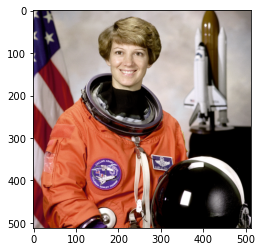

In [112]:
img = skimage.data.astronaut()
smaller_img = resize(img, (64, 64))
plt.imshow(img, cmap='gray')

In [113]:
def get_mgrid(sidelen):
    '''Generates a flattened grid of (x,y,...) coordinates in a range of -1 to 1.'''
    width = tf.linspace(-1, 1, sidelen)
    height = tf.linspace(-1, 1, sidelen)
    mgrid = tf.stack(tf.meshgrid(width, height), axis=-1)
    mgrid = tf.reshape(mgrid, [-1, 2])
    return mgrid

In [114]:
image_side_length = smaller_img.shape[0]
X = get_mgrid(image_side_length)      # Inputs
y = tf.reshape(smaller_img, [-1, 3])  # Outpus

print(X.shape)
print(y.shape)

(4096, 2)
(4096, 3)


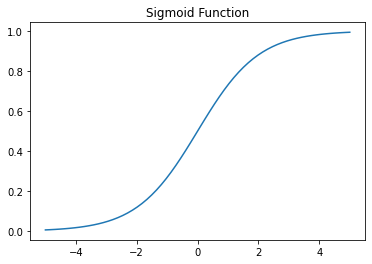

In [115]:
_x = np.linspace(-5, 5, 64)
_y = tf.sigmoid(_x)
plt.title('Sigmoid Function')
plt.plot(_x, _y)

In [116]:
# Our model!
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='sigmoid')
])
model.compile(loss='mse', optimizer='sgd')

In [103]:
model.fit(X, y, epochs=8, batch_size=1)

Epoch 1/8
4096/4096 [==============================] - 2s 395us/step - loss: 0.0750
Epoch 2/8
4096/4096 [==============================] - 2s 395us/step - loss: 0.0612
Epoch 3/8
4096/4096 [==============================] - 2s 372us/step - loss: 0.0574
Epoch 4/8
4096/4096 [==============================] - 2s 374us/step - loss: 0.0557
Epoch 5/8
4096/4096 [==============================] - 2s 384us/step - loss: 0.0545
Epoch 6/8
4096/4096 [==============================] - 2s 382us/step - loss: 0.0536
Epoch 7/8
4096/4096 [==============================] - 2s 401us/step - loss: 0.0529
Epoch 8/8
4096/4096 [==============================] - 2s 397us/step - loss: 0.0523


In [104]:
# Our traning data is stored in 'X', so lets pass that
# into our trained model and see what it produces.
prediction = model.predict(X)

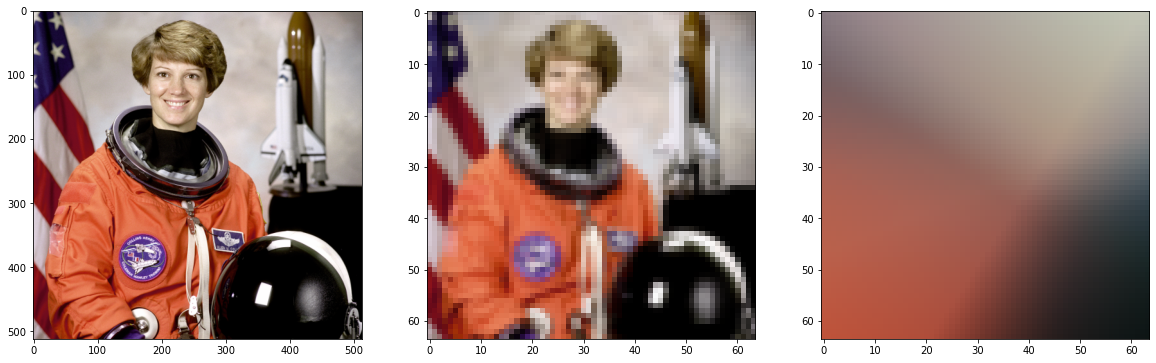

In [117]:
# Reshape it from 1D to 2D
reconstructed_img = tf.reshape(prediction, (64,64,3))

# Scale the values from [0,1] to [0, 255]
reconstructed_img *= 255

# Convert the tensor into a numpy array, and cast the type into a uint8.
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)

# Look at our creation next to the original!
fig, axes_array = plt.subplots(1,3, figsize=(20,10))
axes_array[0].imshow(img)
axes_array[1].imshow(smaller_img)
axes_array[2].imshow(reconstructed_img)
plt.show()

In [118]:
# Our traning data is stored in 'X', so lets pass that
# into our trained model and see what it produces.
prediction = model.predict(X)

# Our 'y' training data was a 1D array remember, so it 
# makes sense that the output of our model is the same.
print(prediction.shape)

(4096, 3)


In [119]:
# Look at the first 10 values of the output.
print(prediction[:10])

[[0.40365964 0.51274544 0.4018107 ]
 [0.40460867 0.5123118  0.4026426 ]
 [0.40560025 0.51199585 0.4034981 ]
 [0.40659258 0.5116798  0.40435418]
 [0.40758565 0.5113638  0.40521085]
 [0.40857953 0.5110478  0.4060681 ]
 [0.40957412 0.51073176 0.40692592]
 [0.41052127 0.5100616  0.40812844]
 [0.41137123 0.50867224 0.41003186]
 [0.41222167 0.50728273 0.41193798]]


In [120]:
min_val = prediction.min()
max_val = prediction.max()

print(min_val, max_val)

0.2813919 0.512793


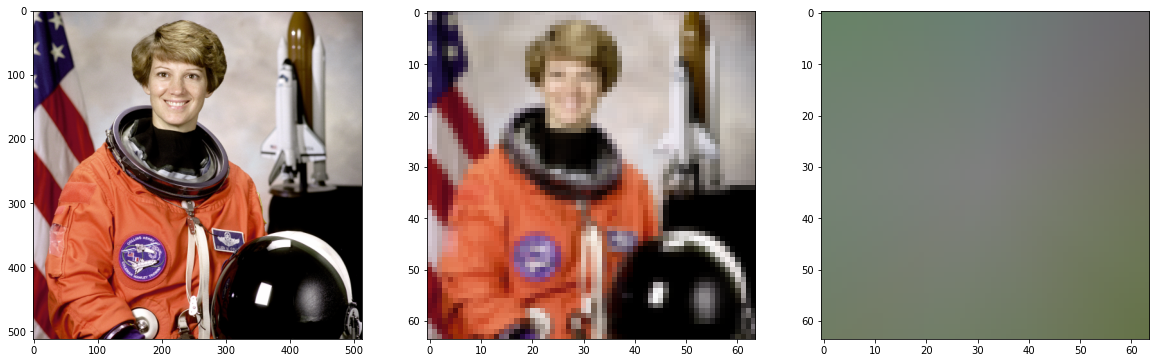

In [122]:
def view_output(prediction, image_shape=(64,64,3)):
    # Reshape it from 1D to 2D
    reconstructed_img = tf.reshape(prediction, image_shape)
    
    # Scale the values from [0,1] to [0, 255]
    reconstructed_img *= 255
    
    # Convert the tensor into a numpy array, and cast the type into a uint8.
    reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
    
    # Look at our creation next to the original!
    fig, axes_array = plt.subplots(1,3, figsize=(20,10))
    axes_array[0].imshow(img)
    axes_array[1].imshow(smaller_img)
    axes_array[2].imshow(reconstructed_img)
    plt.show()
    
view_output(prediction)

In [123]:
model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=16, batch_size=1)

Epoch 1/16
4096/4096 [==============================] - 2s 429us/step - loss: 0.0546
Epoch 2/16
4096/4096 [==============================] - 2s 448us/step - loss: 0.0492
Epoch 3/16
4096/4096 [==============================] - 2s 435us/step - loss: 0.0472
Epoch 4/16
4096/4096 [==============================] - 2s 434us/step - loss: 0.0454
Epoch 5/16
4096/4096 [==============================] - 2s 437us/step - loss: 0.0429
Epoch 6/16
4096/4096 [==============================] - 2s 452us/step - loss: 0.0408
Epoch 7/16
4096/4096 [==============================] - 2s 438us/step - loss: 0.0393
Epoch 8/16
4096/4096 [==============================] - 2s 446us/step - loss: 0.0377
Epoch 9/16
4096/4096 [==============================] - 2s 434us/step - loss: 0.0366
Epoch 10/16
4096/4096 [==============================] - 2s 440us/step - loss: 0.0352
Epoch 11/16
4096/4096 [==============================] - 2s 428us/step - loss: 0.0341
Epoch 12/16
4096/4096 [==============================] - 2s 434

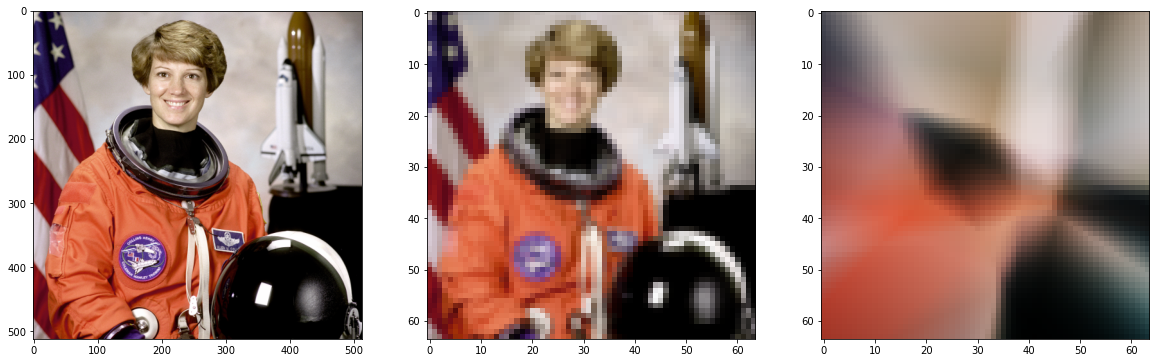

In [124]:
new_prediction = model.predict(X)
view_output(new_prediction)

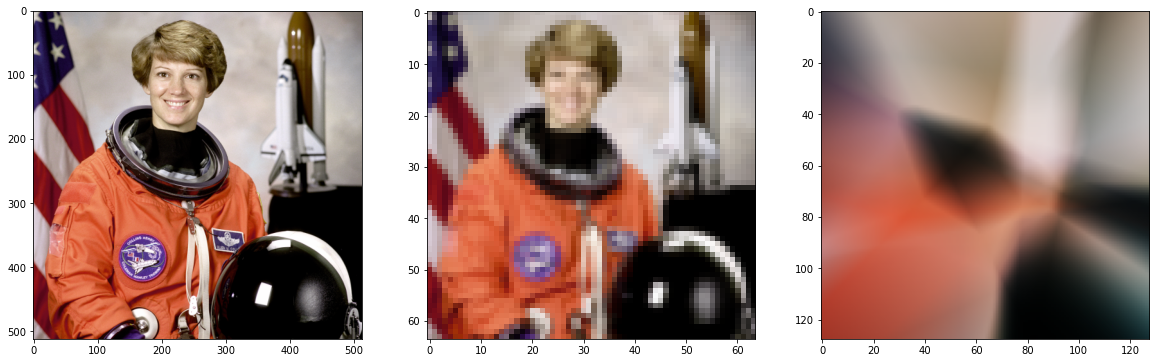

In [125]:
bigger_X = get_mgrid(128)
bigger_prediction = model.predict(bigger_X)
view_output(bigger_prediction, image_shape=(128, 128,3))

In [126]:
# Giving the model any old coordinates

a = model.predict([[0, 0]])
b = model.predict([[-2, 2]])
c = model.predict([[12, 99]])

print(a, b, c)

[[0.26710486 0.16612992 0.12525225]] [[0.43254137 0.06720933 0.04659417]] [[0. 0. 0.]]


In [127]:
def get_arbitrary_mgrid(sidelen, limits=(-1, 1)):
    '''Generates an arbitrary flattened grid of (x,y,...) coordinates of specified limits.'''
    width = np.linspace(*limits, sidelen)
    height = np.linspace(*limits, sidelen)
    mgrid = np.stack(np.meshgrid(width, height), axis=-1)
    mgrid = np.reshape(mgrid, [-1, 2])
    return mgrid

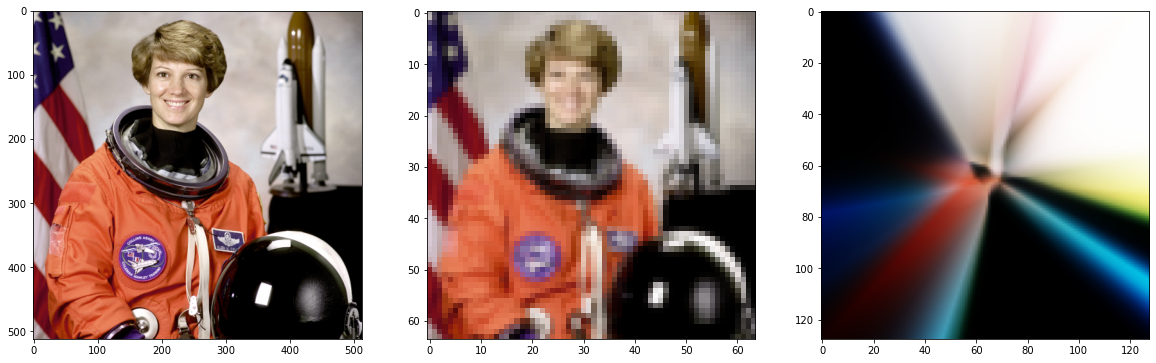

In [128]:
arbitrary_X = get_arbitrary_mgrid(128, limits=(-5, 5))
arbitrary_prediction = model.predict(arbitrary_X)
view_output(arbitrary_prediction, image_shape=(128, 128,3))

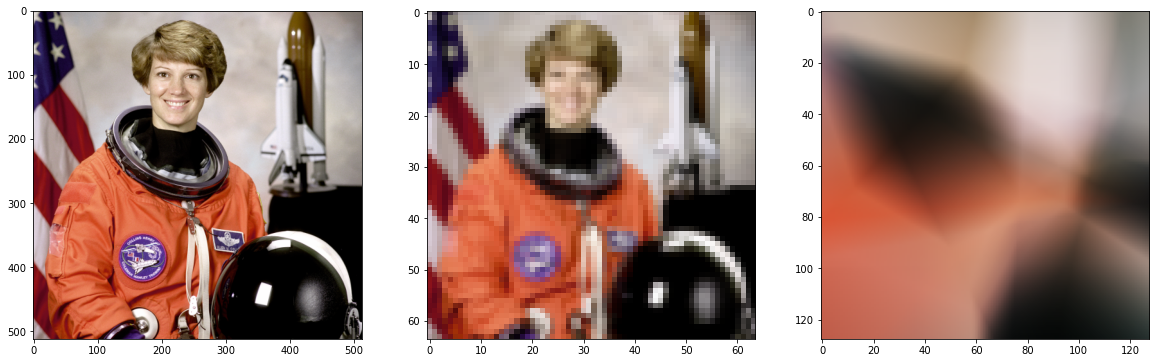

In [129]:
arbitrary_X = get_arbitrary_mgrid(128, limits=(-0.5, 0.7))
arbitrary_prediction = model.predict(arbitrary_X)
view_output(arbitrary_prediction, image_shape=(128, 128,3))

In [ ]:
CPPN images are randomly generated on top of existing images. Very high resolution images can be generated.

Modify the VAE encoder network from a fully connected 2 layer softplus network into a deeper CNN that can identify better features from images in a spatial invariant way.

Train on a discrete cosine transformed version of the images, and have the network generate a DCT representation of new images to be inverted back to spatial domain.

Modify generator network to take advantage of residual / stochastic layer type of training. Getting a 10-plus layer network to learn is proving to be very challenging. Any attempt at dropout will also make the network generate very blurry images.